# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2')

# importと関数定義

In [5]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    print("shape: " + str(vec.shape))
    print("")

# 確率勾配降下法

ストリーミング出力は最後の 5000 行に切り捨てられました。
出力合計: 6.658537054967285
*** 偏微分_重み1 ***
[[-1.9729516   5.27238073 -1.01147441  2.70347662 -0.23417887 -0.83069188
  -0.58780084 -3.51320075  2.64884987 -1.74762384]
 [-5.34151963 14.27431123 -2.73844043  7.31932472 -0.63401    -2.24899435
  -1.59139724 -9.51155151  7.17142965 -4.73147291]]
shape: (2, 10)

*** 偏微分_重み2 ***
[-4.94924976e+00 -9.43982176e-79 -4.94924976e+00 -1.41507836e-49
 -4.94924976e+00 -4.94924976e+00 -4.94924976e+00 -4.94924976e+00
 -1.15086102e-48 -4.94924976e+00]
shape: (10,)

*** 偏微分_バイアス1 ***
[-1.43023768  3.82206922 -0.7332409   1.95981195 -0.16976161 -0.60218752
 -0.42611026 -2.54679947  1.92021178 -1.26689244]
shape: (10,)

*** 偏微分_バイアス2 ***
-4.9492497550371475
shape: ()

*** 総入力1 ***
[ 38.82102638 -56.8648248   23.67933913 -32.74065664  14.41023495
  19.74215761  15.09417689   9.95163015 -29.83056813  27.5873095 ]
shape: (10,)

*** 中間層出力1 ***
[1.00000000e+00 2.01335508e-25 1.00000000e+00 6.03828330e-15
 9.99999448e-01 9.99999997e

/content/drive/My Drive/DNN_code_colab_lesson_1_2/common/functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


ストリーミング出力は最後の 5000 行に切り捨てられました。
-8.798969191274956
shape: ()

出力合計: -8.798969191274956
*** 偏微分_重み1 ***
[[ -3.96013294   8.00561798  -2.75187447   4.38151264  -4.49789013
   -3.41265198  -4.09186524  -5.32993217   4.69731743  -3.02009217]
 [-10.80911182  21.85119066  -7.51119201  11.95926015 -12.27691042
   -9.31477237 -11.16867276 -14.54795424  12.82124367  -8.24328741]]
shape: (2, 10)

*** 偏微分_重み2 ***
[0.00000000e+000 6.69117320e+000 1.26284054e-233 6.69117320e+000
 6.35723691e-248 2.17337273e-234 8.38942087e-242 0.00000000e+000
 6.69117320e+000 0.00000000e+000]
shape: (10,)

*** 偏微分_バイアス1 ***
[ 2.16257679 -4.37176325  1.50276265 -2.39268673  2.45623896  1.86360461
  2.23451408  2.91060623 -2.5651436   1.64923283]
shape: (10,)

*** 偏微分_バイアス2 ***
6.691173198710077
shape: ()

*** 総入力1 ***
[ 202.20782089 -520.58289713  117.85113191 -302.08969397  122.98014112
  115.12487081  118.79675061  324.93323084 -302.82837225  197.86299181]
shape: (10,)

*** 中間層出力1 ***
[1.00000000e+000 8.19823573e-

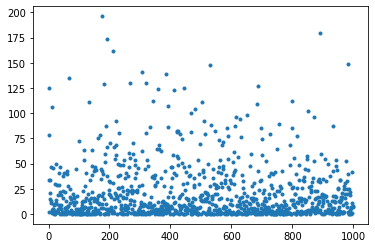

In [13]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    #print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()